In [2]:
def hypothesis(x, m, b):
    p = list()
    for i in x:
        p.append(i * m + b)
    return p

In [3]:
x = list(range(12))
x

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [4]:
y = hypothesis(x, 2, 1)
y

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23]

In [5]:
def cost_function(x, y, m, b):
    c = 0
    for i in range(len(x)):
        h = m * x[i] + b
        loss = h - y[i]
        c += loss**2
    return (1/len(x) * 0.5 * c)

In [6]:
cost_function(x, y, 2, 1)

0.0

In [9]:
def gradient_descent(x, y, m, b, alpha, iter):
    z = len(y)
    theta_hist = []
    cost_hist = []
    for i in range(iter):
        h = hypothesis(x, m, b)
        grad_m = 0
        grad_b = 0
        for j in range(z):
            grad_m += (h[j] - y[j]) * x[j]
            grad_b += h[j] - y[j]
            
        m = m - alpha * grad_m
        b = b - alpha * grad_b
        theta_hist.append([m,b])
        cost_hist.append(cost_function(x, y, m, b))
    return theta_hist, cost_hist

In [13]:
history, costs = gradient_descent(x, y, 0, 0, 0.05, 50)
history

[[array([37.25614897]), array([33.40716387])],
 [array([-312.56995217]), array([-275.39272979])],
 [array([2949.24215454]), array([2604.6218077])],
 [array([-27467.66118059]), array([-24251.84875317])],
 [array([256174.15251345]), array([226188.45570404])],
 [array([-2388824.91262238]), array([-2109201.95028286])],
 [array([22276156.45966739]), array([19668635.94046709])],
 [array([-2.07728199e+08]), array([-1.83412708e+08])],
 [array([1.93709417e+09]), array([1.71034886e+09])],
 [array([-1.80636704e+10]), array([-1.59492392e+10])],
 [array([1.6844622e+11]), array([1.48728857e+11])],
 [array([-1.57078425e+12]), array([-1.38691712e+12])],
 [array([1.464778e+13]), array([1.29331936e+13])],
 [array([-1.3659257e+14]), array([-1.20603815e+14])],
 [array([1.27374457e+15]), array([1.12464722e+15])],
 [array([-1.18778439e+16]), array([-1.04874906e+16])],
 [array([1.10762534e+17]), array([9.77972973e+16])],
 [array([-1.03287592e+18]), array([-9.11973296e+17])],
 [array([9.63171053e+18]), array(

In [11]:
import numpy as np
np.random.seed(42)
x = 2 * np.random.rand(100,1)
np.random.seed(41)
y = 4 + 3 * x + np.random.randn(100,1)
x = list(x)
y = list(y)

IndexError: list index out of range

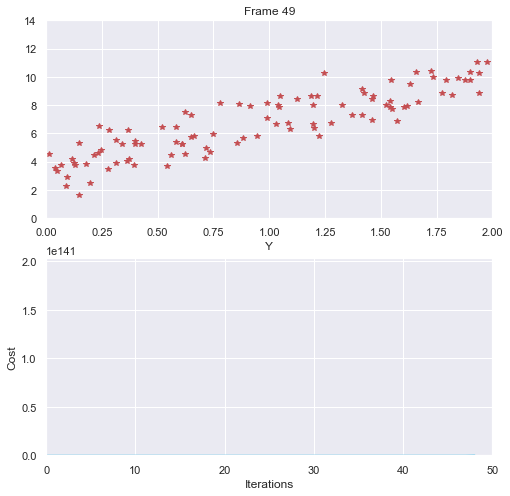

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML, Image
import seaborn as sns
sns.set()


fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,8))
line1, = ax1.plot([], [], color = "r", marker='*', linestyle='None')
line2, = ax1.plot([], [], color = "g")
line3, = ax2.plot([], [], color='skyblue')

val = len(history)

def update(num):
    predict = hypothesis(x, history[num][0], history[num][1])
    ax1.set_title(f"Frame {num}")
    line1.set_data(x, y)
    line2.set_data(x, predict)
    line3.set_data(range(val)[:num], costs[:num])
    return [line1,line2, line3]
ax1.set_xlim(0,2)
ax1.set_xlabel("X")
ax1.set_xlabel("Y")
ax1.set_ylim(0,14)
ax2.set_xlim(0,val)
ax2.set_ylim(0,np.max(costs))
ax2.set_xlabel("Iterations")
ax2.set_ylabel("Cost")


ani = animation.FuncAnimation(fig, update, len(x),
                  interval=val, blit=True)

ani.save('animation.gif', writer='imagemagick', fps=60)
Image(url='animation.gif')
